<a href="https://colab.research.google.com/github/Joefamouze/Machine_learning/blob/master/Fellowshipai_Jonathan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Citation
3D Object Representations for Fine-Grained Categorization
       Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei
       4th IEEE Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.
      
      

# Task
Building a computer vision model with Car dataset, using ResNet as base model for transfer learning.
Visualizing the layer activations using GRADCAM  for mislabeled images.

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Data processing, getting data and preparing a pipeline to feed the model
(train_dataset, test_dataset), dataset_info = tfds.load(
    'Cars196', split=['train', 'test'], with_info=True, as_supervised=True)



Shuffling and writing examples to /root/tensorflow_datasets/cars196/2.0.0.incomplete6TKCXW/cars196-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cars196/2.0.0.incomplete6TKCXW/cars196-test.tfrecord


Dataset cars196 downloaded and prepared to /root/tensorflow_datasets/cars196/2.0.0. Subsequent calls will reuse this data.


In [3]:
num_train_example = dataset_info.splits['train'].num_examples
print('Image features:', dataset_info.features['image'])
print('Label features:', dataset_info.features['label'])
print('Number of training examples:', dataset_info.splits['train'].num_examples)


Image features: Image(shape=(None, None, 3), dtype=tf.uint8)
Label features: ClassLabel(shape=(), dtype=tf.int64, num_classes=196)
Number of training examples: 8144


,image,label
0,,194 (Volvo XC90 SUV 2007)
1,,182 (Suzuki SX4 Hatchback 2012)
2,,190 (Volkswagen Golf Hatchback 1991)
3,,124 (HUMMER H2 SUT Crew Cab 2009)

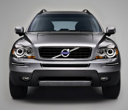
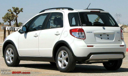
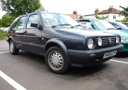
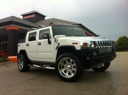

In [4]:
# Visualizing the dataset

tfds.as_dataframe(train_dataset.take(4), dataset_info)
 

In [5]:
IMAGE_RES = 224

def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

# Optimizing training
Due to the size of my dataset, I will be using some optimization techniques to speed up training time. 
I will do this through the following steps

1.   Shuffling the dataset
2.   Using the map function
3.   Batching the dataset
4.   Using the prefetch method
5.   And caching the dataset







In [6]:
train_dataset = train_dataset.shuffle(buffer_size=num_train_example//8).map(format_image).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE).cache()

# Transfer learning

In [7]:
URL = "https://tfhub.dev/google/imagenet/resnet_v1_101/classification/4"
feature_extractor = hub.KerasLayer(URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))

feature_extractor.trainable = False

In [8]:
model = tf.keras.Sequential([
              feature_extractor,
              tf.keras.layers.Dense(196, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              44656553  
_________________________________________________________________
dense (Dense)                (None, 196)               196392    
Total params: 44,852,945
Trainable params: 196,392
Non-trainable params: 44,656,553
_________________________________________________________________


In [9]:
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)



In [ ]:
history = model.fit(train_dataset, epochs=10)

Epoch 1/10
215/255 [========================>.....] - ETA: 6s - loss: 5.2924 - accuracy: 0.0637

# Steps to increase accuracy

1.  The foremost way to increase a model's accuracy is to improve on the data. One can do this by making sure the data is well label,
and augumented if dataset is very small.
2.   Feature engineering
3.   Tuning the hyperparameters.

